### Part 1:  Pose Graph Optimization for 1D SLAM

A solved example for 1D SLAM which optimizes for pose variables using weighted least squares method (Gauss Newton) has been explained in the class. You can view it at `examples/1D-SLAM.ipynb`. Your first task is to code this from scratch.

For this section, you have to calculate Jacobian analytically yourself and use it. However, you can check how correct it is using `jax`'s `jacobian`. Its usage is explained in the supplementary notebook (`examples/`).

### How to get started?

1. Go through the example and understand the optimization procedure.
2. Generate the data as in the example.
3. Write the derivatives of the function with respect to the constraints
4. Create the final jacobian and write the update steps using Gauss Newton

This tiny example will help make sense of the next question, as it's largely just an extension of this.

Finally, plot the loop closure constraint, poses, and error at every iteration as well. Since this is a one dimensional example, you can just assume x = y.

In [3]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

Jacobian matrix values as J
 [[ 1 -1  0  0  0]
 [ 0  1 -1  0  0]
 [ 0  0  1 -1  0]
 [ 0  0  0  1 -1]
 [ 1  0  0  0 -1]
 [ 1  0  0  0  0]]
Sparse and adjacency matrix of factor graph representation of SLAM is determined as H = 
 [[1200 -100    0    0 -100]
 [-100  200 -100    0    0]
 [   0 -100  200 -100    0]
 [   0    0 -100  200 -100]
 [-100    0    0 -100  200]]
By gauss newton, H*delta_x=-b where b =
 [-50.   0.   0.   0.  50.]
Values according to odometry is X0 =
 [0.  1.1 2.1 3.2 0.5]
delta_x =
 [-8.69674703e-18 -1.00000000e-01 -2.00000000e-01 -3.00000000e-01
 -4.00000000e-01]
Xi =
 [-8.69674703e-18  1.00000000e+00  1.90000000e+00  2.90000000e+00
  1.00000000e-01]


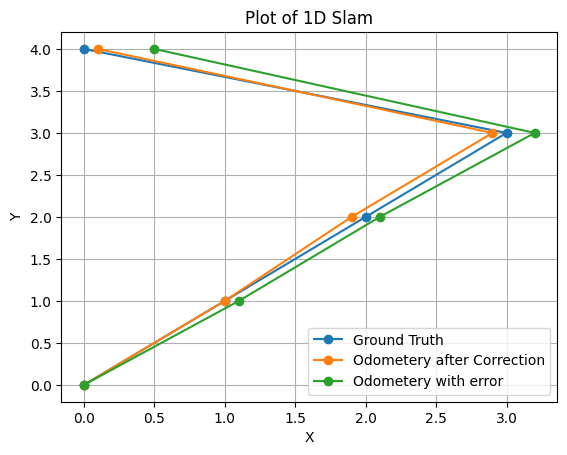

In [33]:
#test


class posegraph:
    def __init__(self):
        self.J = None

    def my_input(self):
        self.J = np.array([
        [1, -1, 0, 0, 0],
        [0, 1, -1, 0, 0],
        [0, 0, 1, -1, 0],
        [0, 0, 0, 1, -1],
        [1, 0, 0, 0, -1],
        [1, 0, 0, 0, 0]
    ])
        # self.J = []  
        # print("Enter the Jacobian matrix (6x5) as J:")
        # for _ in range(6):
        #     row = input("Enter the values in row-wise and give spaces between values: ")
        #     self.J.append([float(val) for val in row.split()])
        # self.J = np.array(self.J)
        print("Jacobian matrix values as J\n", self.J)

    def delta_x(self, info_matrix, f_X0):
        H = self.J.T @ info_matrix @ self.J
        print("Sparse and adjacency matrix of factor graph representation of SLAM is determined as H = \n",H)
        b =  self.J.T @ info_matrix.T @ f_X0
        print("By gauss newton, H*delta_x=-b where b =\n",b)
        det_H = np.linalg.det(H)
        if det_H == 0:
            return None
        delta_x = np.linalg.solve(H, -self.J.T @ info_matrix @ f_X0)
        return delta_x

    def run(self):
        self.my_input()
        X0 = np.array([0, 1.1, 2.1, 3.2, 0.5])     # Values according to odometry
        info_matrix = np.array([[100, 0, 0, 0, 0, 0],
                          [0, 100, 0, 0, 0, 0],
                          [0, 0, 100, 0, 0, 0],
                          [0, 0, 0, 100, 0, 0],
                          [0, 0, 0, 0, 100, 0],
                          [0, 0, 0, 0, 0, 1000]])
        f_X0 = np.array([0, 0, 0, 0, -0.5, 0])
        f_X0 = np.transpose(f_X0)                  #f(X0) is the initialization of f(X)
        delta_x = self.delta_x(info_matrix, f_X0)
        if delta_x is not None:
            Xi = X0 + delta_x
            print("Values according to odometry is X0 =\n", X0)
            
            print("delta_x =\n", delta_x)
            
            print("Xi =\n", Xi)
        
        else:
            print("No unique solution found. Check the input matrix J.")
    

if __name__ == "__main__":
    SLAM_1D = posegraph()
    SLAM_1D.run()
    
    X = [0, 1, 2, 3, 0]
    Y = [0, 1, 2, 3, 4]
    Xic =[-8.69674703e-18,  1.00000000e+00,  1.90000000e+00,  2.90000000e+00,
    1.00000000e-01]
    Xie = [ 0, 1.1, 2.1, 3.2, 0.5]
    # t = [0, 0, 0, 0 , 0.785]

    # draw(X, Y, t)

    # Create a plot that connects the points with lines
    plt.plot(X, Y, label='Ground Truth', marker='o')
    plt.plot(Xic, Y, label='Odometery after Correction', marker='o')
    plt.plot(Xie, Y, label='Odometery with error', marker='o')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Plot of 1D Slam')
    plt.legend()
    plt.grid(True)
    plt.show()
